# Evaluation Metrics. 

In [1]:
# Import package. 

# Data Manipulation.
import pandas as pd
import numpy as np

# Data Visualization.
import seaborn as sns
import matplotlib.pyplot as plt

# Other packages.
%matplotlib inline

In [2]:
# Scikit Learn Packages.
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [3]:
# Loading Data. 
telco_data = pd.read_csv('data/telco_customer_churn.csv')

# Viewing data. 
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# viewing columns 
telco_data.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [5]:
# Telco Data. 
columns = telco_data.columns

# Viewing.
columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
# Converting upper case to lower case. 
columns = columns.str.lower()

telco_data.columns = columns

In [7]:
# Viewing Columns. 
telco_data.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [8]:
# Data structure.
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [9]:
# converting records to lower case and replacing spce with _. 
categorical_columns = telco_data.columns[telco_data.dtypes == 'object']

# Creating a loop 

for cat in categorical_columns: 
    telco_data[cat] = telco_data[cat].str.lower().str.replace(' ', '_')
    
# Converting churn to int. 
telco_data['churn'] = (telco_data['churn'] == 'yes').astype(int)
    
telco_data.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [10]:
# Checking for null. 
telco_data.isna().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [11]:
# Converting totalcharge column to number. 
telco_data['totalcharges'] = pd.to_numeric(telco_data['totalcharges'], errors='coerce')

# Filling null values with 0. 
telco_data['totalcharges'] = telco_data['totalcharges'].fillna(0)

# checking for null. 
telco_data['totalcharges'].isna().sum()

0

In [12]:
# Setting up data validation dataset. 
telco_full_train, telco_test = train_test_split(telco_data, test_size = 0.20, random_state = 1)

# Setting up training dataset.
telco_train, telco_val = train_test_split(telco_full_train, test_size = 0.25, random_state = 1)

# Creating y features. 
telco_full_ytrain = telco_full_train['churn'].values
telco_ytrain = telco_train['churn'].values
telco_ytest = telco_test['churn'].values
telco_yval = telco_val['churn'].values

# Deleting churn from dataset. 
del telco_full_train['churn']
del telco_train['churn']
del telco_val['churn']
del telco_test['churn']

In [13]:
# Converting data to one hot encodeing.

# Creating Dictvetorizer instance.
dv = DictVectorizer(sparse=False)

# Converting data to dict. 
dict_train = telco_train.to_dict(orient = 'records')

# Fitting and transforming dict_data. 
x_train = dv.fit_transform(dict_train)

In [14]:
telco_train.isnull().any()

customerid          False
gender              False
seniorcitizen       False
partner             False
dependents          False
tenure              False
phoneservice        False
multiplelines       False
internetservice     False
onlinesecurity      False
onlinebackup        False
deviceprotection    False
techsupport         False
streamingtv         False
streamingmovies     False
contract            False
paperlessbilling    False
paymentmethod       False
monthlycharges      False
totalcharges        False
dtype: bool

In [15]:
# Training Logistics Regression. 

# Creating instanse. 
model = LogisticRegression()
model.fit(x_train, telco_ytrain)

C:\Users\User1\anaconda3\envs\ml-zoomcamp\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
# convertin data to dict.
dict_val = telco_val.to_dict(orient = 'records')
x_val = dv.transform(dict_val)

# Predicting Y with validation dataset. 
y_pred = model.predict_proba(x_val)[:, 1]

# Creating threshold 
churn_decision = (y_pred >= 0.5)

# checking probability of churn
(telco_yval.astype(int) == churn_decision).mean()

0.8048261178140526

## Accuracy 

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
# Accuracy score for valiation dataset. 
accuracy_score(telco_yval, y_pred >= 0.5)

0.8048261178140526

In [19]:
# Testing Threshold.
threshold = np.linspace(0,1, 21)

threshold

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [20]:
# Create a loop to test threshold accuracy
accuracy = []

for t in threshold:
    score = accuracy_score(telco_yval, y_pred >= t)
    accuracy.append(score)
    print(f"{t.round(2)}: {score.round(3)}")

0.0: 0.274
0.05: 0.507
0.1: 0.598
0.15: 0.661
0.2: 0.703
0.25: 0.739
0.3: 0.755
0.35: 0.764
0.4: 0.784
0.45: 0.794
0.5: 0.805
0.55: 0.796
0.6: 0.787
0.65: 0.779
0.7: 0.757
0.75: 0.735
0.8: 0.726
0.85: 0.726
0.9: 0.726
0.95: 0.726
1.0: 0.726


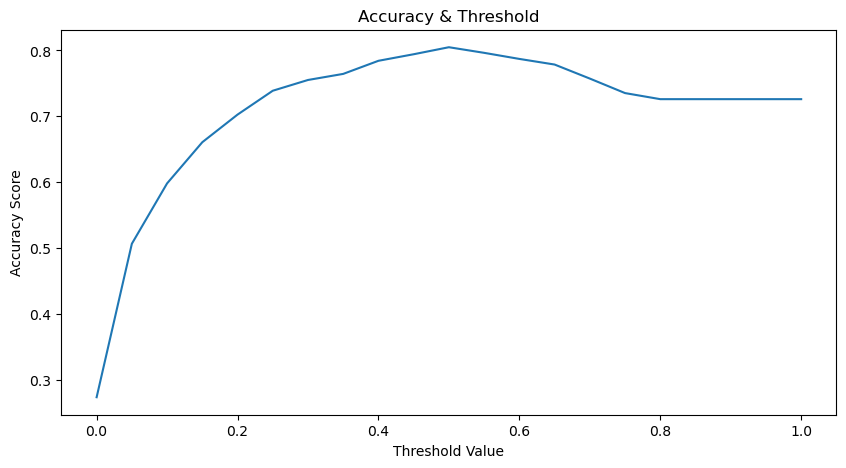

In [21]:
# Plot Size.
plt.figure(figsize = [10, 5])
# Plot a line plot to visualize the 
plt.plot(threshold, accuracy)

# Plot Annotation. 
plt.title('Accuracy & Threshold')
plt.xlabel('Threshold Value')
plt.ylabel('Accuracy Score')

# Show Plot
plt.show();

## Confusion Table. 


In [22]:
# Deriving Table values. 
tp = ((y_pred > 0.5) & (telco_yval == 1)).sum()
tn = ((y_pred < 0.5) & (telco_yval == 0)).sum()
fp = ((y_pred > 0.5) & (telco_yval == 0)).sum()
fn = ((y_pred < 0.5) & (telco_yval == 1)).sum()

In [23]:
# Checking values. 
tp,tn,fp,fn

(213, 921, 102, 173)

In [24]:
# Viewing tabular result. 
confusion_table = np.array([tp, tn, fp, fn ])

# viewing 
confusion_table

array([213, 921, 102, 173])

## Precision & Recall. 

This is an alternative measurement for accuracy score and it's base of confusion table.

### Precision Score. 
This is the fraction of correct prediction positive records divided by the total positive predictions. 

p = tp/ (fp + tp) 

In [25]:
# Getting p prediction. 
p = tp/ (tp + fp)

# Checking values. 
p

0.6761904761904762

### Recall Score. 
This is the fraction of correctly identify predicted positive values divided by the total positive actual value. 

In [26]:
# Calculating r recall score. 
r = tp/ (tp + fn)

# Checking result. 
r

0.5518134715025906

In [27]:
# Comparing metric values. 
accuracy_score = accuracy_score(telco_yval, y_pred >= 0.5).round(3)
r_score = r.round(3)
p_score = p.round(3)

# Viewing 
accuracy_score, p_score, r_score

(0.805, 0.676, 0.552)

## ROC Curve. 

In [35]:
# TPR & FPR

# TPR Score.
tpr = tp/ (tp + fn)

# FPR Score. 
fpr = fn/ (fn + tn)


# Checking result. 
tpr.round(2), fpr.round(2)

(0.55, 0.16)

In [39]:
# Evaluating different threshold.
threshold = np.linspace(0, 1, 101)

# Score List. 
score = []

# Creating loop
for t in threshold: 
    tp = ((y_pred >= t) & (telco_yval == 1)).sum()
    fp = ((y_pred >= t) & (telco_yval == 0)).sum()
    tn = ((y_pred < t) & (telco_yval == 0)).sum()
    fn = ((y_pred < t) & (telco_yval == 1)).sum()
    tpr = tp/ (tp + fn) 
    fpr = fn/ (fn + tn)
    
    score.append((t, tp, fp, tn, fn, tpr, fpr))

# Converting Data to a dataframe. 
df_score = pd.DataFrame(score)
df_score.columns = ['threshold', 'tp', 'fp', 'tn', 'fn', 'tpr', 'fpr']

# Checking data frame. 
df_score[::10]
    

C:\Users\User1\AppData\Local\Temp\ipykernel_6440\1395911450.py:14: RuntimeWarning: invalid value encountered in long_scalars
  fpr = fn/ (fn + tn)


,threshold,tp,fp,tn,fn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,NaN
10,0.1,367,547,476,19,0.950777,0.038384
20,0.2,335,368,655,51,0.867876,0.072238
30,0.3,291,250,773,95,0.753886,0.109447
40,0.4,256,174,849,130,0.663212,0.132789
50,0.5,213,102,921,173,0.551813,0.158135
60,0.6,140,54,969,246,0.362694,0.202469
70,0.7,55,11,1012,331,0.142487,0.246463
80,0.8,0,0,1023,386,0.000000,0.273953
90,0.9,0,0,1023,386,0.000000,0.273953


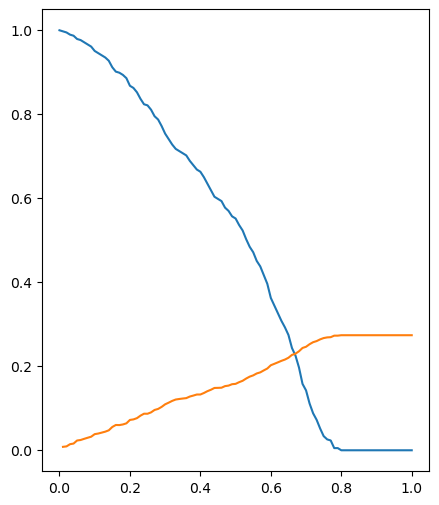

In [40]:
# Visualizing TPR and FPR. 
plt.figure(figsize = [5, 6])

plt.plot(df_score.threshold, df_score.tpr , label = 'TPR')
plt.plot(df_score.threshold, df_score.fpr, label= 'FPR')

